<a href="https://colab.research.google.com/github/JabborovRoboCoder/Customer_churn/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mijozning noroziligini (customer churn) aniqlash

Biznesda eng ko'p uchraydigan muammolardan biri. Mijozning kayfiyatini aniqlash.

Agar biznes egasi mijoz qaytmasligini, maxsulot yoki xizmatdan qayta foydanalmasligini oldindan bashorat qila olsa, mijozni ushlab qolish uchun, uning fikrini o'zgartirish uchun harakat qilishi mumkin.

Ushbu amaliyotda biz online do'kon xaridorlari ma'lumotlarini tahlil qilish orqali mijozning qolish-qolmasligini bashorat qilamiz.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
df = pd.read_excel("https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true",sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.shape

(5630, 20)

In [ ]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

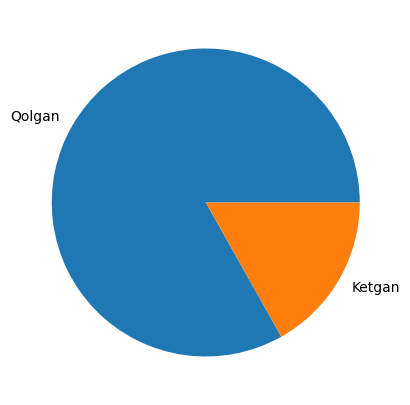

In [ ]:
churn_rate = df['Churn'].value_counts()/len(df)*100

plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan','Ketgan'])
plt.show()

In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

<ipython-input-9-b361e99cad45>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Churn']).abs().sort_values(ascending=False)


Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [ ]:
df['Gender'].isnull().sum()

0

In [ ]:
data =df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]
data.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus,Gender
0,1,4.0,1,5.0,159.93,Single,Female
1,1,NaN,1,0.0,120.90,Single,Male
2,1,NaN,1,3.0,120.28,Single,Male
3,1,0.0,0,3.0,134.07,Single,Male
4,1,0.0,0,3.0,129.60,Single,Male


In [ ]:
data =data.dropna()
data.shape

(5059, 7)

In [ ]:
data['Churn'].value_counts()

0    4246
1     813
Name: Churn, dtype: int64

In [ ]:
encoded = pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1,4.0,1,5.0,159.93,0,0,1,1,0
3,1,0.0,0,3.0,134.07,0,0,1,0,1
4,1,0.0,0,3.0,129.60,0,0,1,0,1
5,1,0.0,1,7.0,139.19,0,0,1,1,0
8,1,13.0,1,2.0,126.83,1,0,0,0,1


In [ ]:
x = encoded.drop('Churn',axis=1)
y = encoded['Churn']

In [ ]:
scaler =StandardScaler()
x =scaler.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [ ]:
#ML
#Logistic Regression

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr_model.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
print("Modelni aniqligi: ", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.75      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.82      0.68      0.72      1012
weighted avg       0.87      0.88      0.86      1012

Modelni aniqligi:  0.8794466403162056


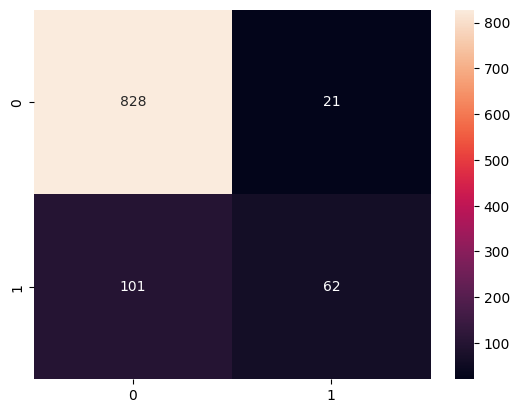

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

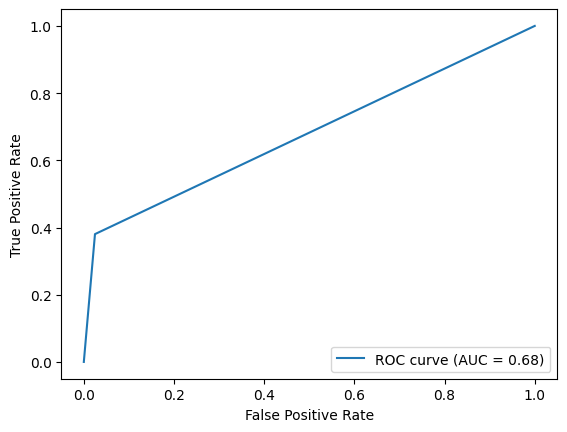

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [ ]:
#ML
#Support Vector Machines

svm_model =SVC()
svm_model.fit(x_train,y_train)

SVC()

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       849
           1       0.67      0.31      0.42       163

    accuracy                           0.86      1012
   macro avg       0.77      0.64      0.67      1012
weighted avg       0.85      0.86      0.84      1012

Model aniqligi: 0.8636363636363636


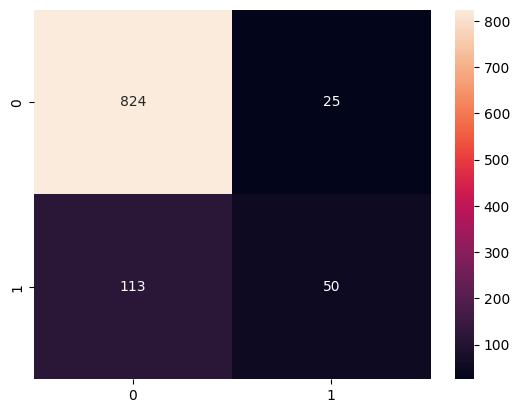

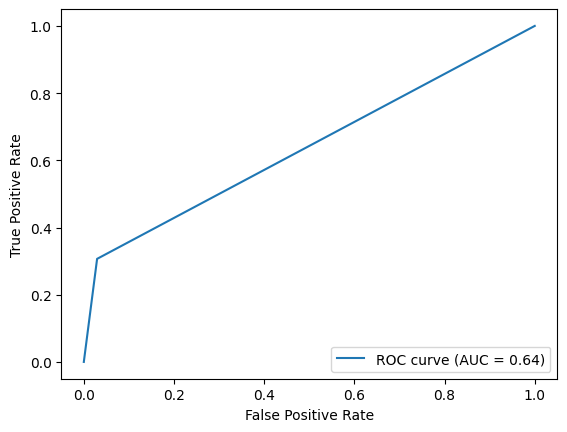

In [ ]:
# Modelni baholaymiz
y_pred = svm_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [ ]:
#ML
#Decision Tree

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.85      0.90      0.87       163

    accuracy                           0.96      1012
   macro avg       0.91      0.93      0.92      1012
weighted avg       0.96      0.96      0.96      1012

Model aniqligi: 0.9575098814229249


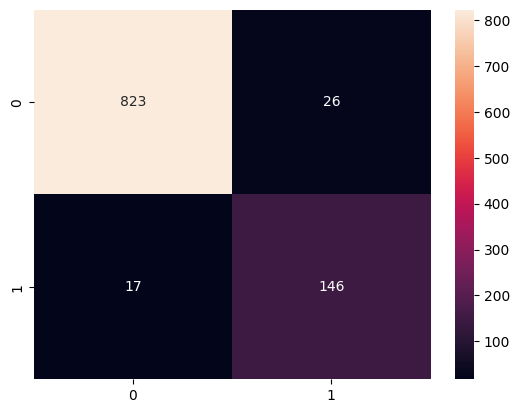

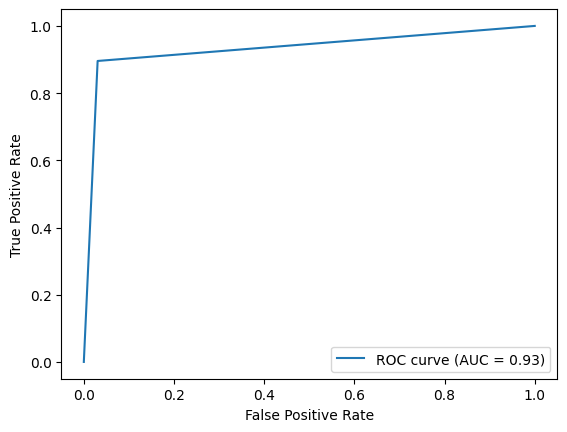

In [ ]:
# Modelni baholaymiz
y_pred = tree_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()